In [56]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot , add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

matplotlib.rc("axes" , unicode_minus = False)
plt.rcParams['font.family'] = 'NanumGothic'

# 실습1

다중선형 회귀분석 규제화

In [17]:
df = pd.read_csv("DIABETES.csv")
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [18]:
df.replace({"GENDER" :{2 : 0}})

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,0,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,75,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,141,72,0,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,206,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,135,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...,...
437,178,60,0,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,104,47,0,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,132,60,0,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,220,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


성별로 배수관계에 있지 않게 하기 위해서 남자의 값 1 여자의 값을 0으로 변환하였다.

In [113]:
# 목표변수 분리
df_y = df["Y"]
df_x = df.drop("Y", axis = 1)

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,
                                                                test_size = 0.3, random_state = 1107) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


In [103]:
reg_model = smf.ols(formula = "Y ~ AGE +GENDER +BMI +BP +CHOLESTEROL +LDL +HDL +TCH +LTG +GLUCOSE", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     33.23
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           5.87e-43
Time:                        22:37:11   Log-Likelihood:                -1660.4
No. Observations:                 309   AIC:                             3343.
Df Residuals:                     298   BIC:                             3384.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -351.5508     77.188     -4.554      

## 릿지

In [20]:
ridge = Ridge(random_state=10, alpha = 1)
ridge.fit(df_train_x, df_train_y)

print(ridge.intercept_)

-327.35861917811405


In [21]:
df_ridge_coef = pd.DataFrame({"Coef" : ridge.coef_} , index = df_train_x.columns)
df_ridge_coef

,Coef
AGE,0.066176
GENDER,-20.843013
BMI,5.874140
BP,0.949851
CHOLESTEROL,-1.024198
LDL,0.376195
HDL,0.715330
TCH,16.300231
LTG,57.367653
GLUCOSE,0.467320


In [108]:
reg_result.params

Intercept     -351.550836
AGE              0.059726
GENDER         -21.308687
BMI              5.807804
BP               0.944066
CHOLESTEROL     -1.262066
LDL              0.593312
HDL              0.967007
TCH             16.670323
LTG             64.846720
GLUCOSE          0.452601
dtype: float64

릿지 회귀계수와 ols회귀계수를 비교해보면 규제로 인해 릿지 회귀계수가 작아진 것을 확인 할 수 있다.

<Axes: >

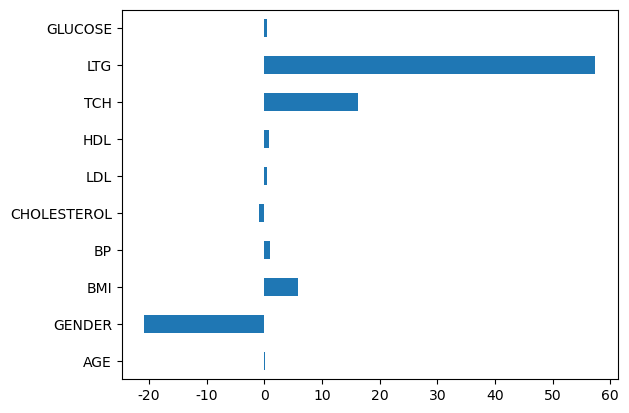

In [22]:
df_ridge_coef.plot.barh(y="Coef" , legend = False)

변수중요도 낮은 변수들은 제거를 해도 된다고 판단된다. <br>
단, 나이변수는 당뇨와 직접적인 연관이 있으므로 포함시켜야 한다고 생각한다.

In [23]:
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print("train data의 결정계수 : " , r2_score(df_train_y, train_pred))
print("test data의 결정계수 : " , r2_score(df_test_y, test_pred))

train data의 결정계수 :  0.5269339553848077
test data의 결정계수 :  0.47392402916929044


의학에서는 제1종오류가 중요하기에 기본적으로 정확도가 높아야 한다. <br>
따라서 결정계수가 0.5수준이므로 실제 실무에서는 사용하기 어렵다고 판단된다. <br>


In [24]:
pd.DataFrame({"실제값" : df_test_y,
              "예측값" : test_pred
             })

,실제값,예측값
119,200,148.083749
207,202,201.774298
236,67,177.201005
288,80,78.536263
174,151,168.773183
...,...,...
110,104,54.742442
226,77,75.120073
105,53,121.465913
192,91,80.759001


# 라쏘


In [25]:
lasso = Lasso(random_state = 10 , alpha = 1)
lasso.fit(df_train_x , df_train_y)

print(lasso.intercept_)

-222.95662517931797


In [26]:
df_lasso_coef = pd.DataFrame({"Coef" : lasso.coef_} , index = df_train_x.columns)
df_lasso_coef

,Coef
AGE,0.075274
GENDER,-15.540226
BMI,6.120013
BP,0.941163
CHOLESTEROL,0.000000
LDL,-0.490156
HDL,-0.502712
TCH,11.323266
LTG,27.949576
GLUCOSE,0.527345


In [109]:
reg_result.params

Intercept     -351.550836
AGE              0.059726
GENDER         -21.308687
BMI              5.807804
BP               0.944066
CHOLESTEROL     -1.262066
LDL              0.593312
HDL              0.967007
TCH             16.670323
LTG             64.846720
GLUCOSE          0.452601
dtype: float64

라쏘 회귀계수와 ols 회귀계수를 확인해보면 회귀계수가 값이 작아졌을 뿐 아니라, <br>
CHOLESTEROL변수의 회귀계수가 0이 된것을 확인 할 수 있다.<br>
이는 라쏘 규제가 된것을 확인할 수 있다.

<Axes: >

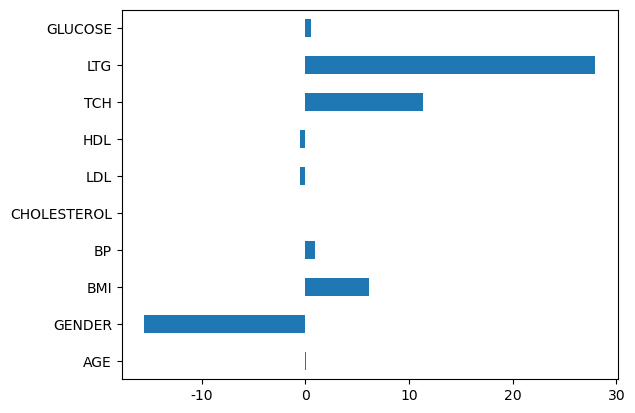

In [27]:
df_lasso_coef.plot.barh(y="Coef" , legend = False)

변수중요도 낮은 변수들은 제거를 해도 된다고 판단된다. <br>
단, 나이변수는 당뇨와 직접적인 연관이 있으므로 포함시켜야 한다고 생각한다.

In [28]:
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print("train data의 결정계수 : " , r2_score(df_train_y, train_pred))
print("test data의 결정계수 : " , r2_score(df_test_y, test_pred))

train data의 결정계수 :  0.5195680169199625
test data의 결정계수 :  0.4700272053470974


의학에서는 제1종오류가 중요하기에 기본적으로 정확도가 높아야 한다. <br>
따라서 라쏘 모델의 결정계수가 0.5수준이므로 실제 실무에서는 사용하기 어렵다고 판단된다.


In [29]:
pd.DataFrame({"실제값" : df_test_y,
              "예측값" : test_pred
             })

,실제값,예측값
119,200,139.573765
207,202,199.223811
236,67,172.298427
288,80,92.913440
174,151,165.601637
...,...,...
110,104,78.466786
226,77,79.247294
105,53,120.803782
192,91,88.251070


# 엘라스틱 넷

In [30]:
elastic = ElasticNet(random_state = 1234 , alpha = 1, l1_ratio = 0.5)
elastic.fit(df_train_x , df_train_y)

print(elastic.intercept_)

-125.97354795971623


In [31]:
df_elastic_coef = pd.DataFrame({"Coef" : elastic.coef_} , index = df_train_x.columns)
df_elastic_coef

,Coef
AGE,0.065282
GENDER,-5.013475
BMI,6.251041
BP,0.894338
CHOLESTEROL,1.009811
LDL,-1.298332
HDL,-1.783875
TCH,3.682241
LTG,2.274284
GLUCOSE,0.586231


In [111]:
reg_result.params

Intercept     -351.550836
AGE              0.059726
GENDER         -21.308687
BMI              5.807804
BP               0.944066
CHOLESTEROL     -1.262066
LDL              0.593312
HDL              0.967007
TCH             16.670323
LTG             64.846720
GLUCOSE          0.452601
dtype: float64

엘라스틱 넷의 회귀계수는 ols회귀계수와 비교하면 값이 작아진 것도 있고, 값이 커진것도 존재한다.<br>
상관관계가 높은 변수는 값이 커진것으로 판단된다.


<Axes: >

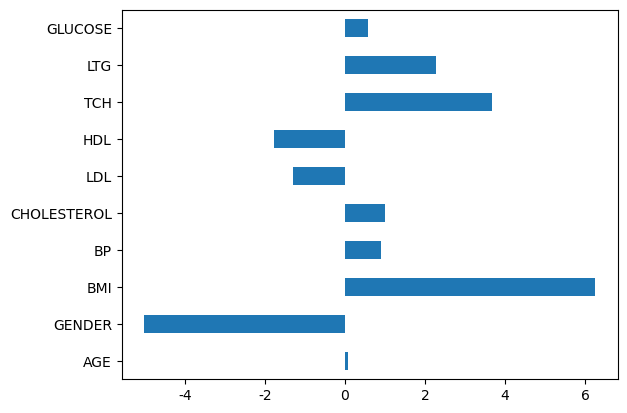

In [32]:
df_elastic_coef.plot.barh(y="Coef" , legend = False)

엘라스틱넷으로 회귀를 한 결과 변수의 중요도는 모든 변수가 어느정도의 중요도를 갖고 있다고 판단된다.

In [33]:
train_pred = elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)
print("train data의 결정계수 : " , r2_score(df_train_y, train_pred))
print("test data의 결정계수 : " , r2_score(df_test_y, test_pred))

train data의 결정계수 :  0.49733257397031905
test data의 결정계수 :  0.4551451537705766


In [34]:
pd.DataFrame({"실제값" : df_test_y,
              "예측값" : test_pred
             })

,실제값,예측값
119,200,131.014682
207,202,196.977281
236,67,165.021949
288,80,107.896240
174,151,167.183857
...,...,...
110,104,101.487200
226,77,87.495079
105,53,123.045311
192,91,100.091773


릿지 , 라쏘 , 엘라스틱 넷의 결정계수의 값이 모두 0.5수준에 머문다. <br>
의학데이터를 다루는 모델의 정확도는 중요하다고 판단되기에 결정계수가 0.5수준인 이 모델은 <br> 실무에서 사용하기 어렵다고 판단된다.

# 실습2 의사결정나무

In [35]:
# 라이브러리 불러오기
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

In [120]:
tree_uncustomized = DecisionTreeRegressor(random_state = 314)
tree_uncustomized.fit(df_train_x , df_train_y)
print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x , df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x , df_test_y)))


Score on training set : 1.000
Score on test set : 0.024


In [121]:
tree_uncustomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 314,
 'splitter': 'best'}

In [130]:
# 파라미터 min_samples_leaf에 대해 최적값 찾기

train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 314,
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x , df_train_y)
    train_score.append(tree.score(df_train_x , df_train_y))
    test_score.append(tree.score(df_test_x , df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.024
1,2,0.954,-0.009
2,3,0.895,-0.030
3,4,0.850,0.023
4,5,0.787,0.147
5,6,0.726,0.189
6,7,0.694,0.114
7,8,0.666,0.143
8,9,0.658,0.183
9,10,0.637,0.179


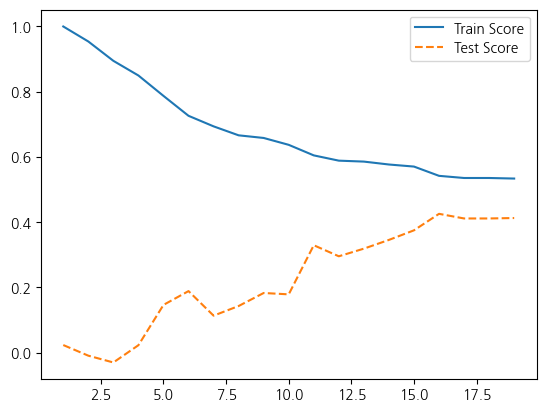

In [131]:
plt.plot(para_leaf , train_score , linestyle = "-" , label = "Train Score")
plt.plot(para_leaf , test_score , linestyle = "--" , label = "Test Score")
plt.legend()

min_samples_leaf가 증가하면 모델의 설명력은 감소한다.
데이터의 성능 변화를 고려하여 9개를 택했다.

In [132]:
# min_samples_split : 분리 노드의 최소 자료 수 

train_score = []; test_score = []
para_split = [n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 10,
                                min_samples_leaf = 9,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x , df_train_y)
    train_score.append(tree.score(df_train_x , df_train_y))
    test_score.append(tree.score(df_test_x , df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)


,MinSamplesSplit,TrainScore,TestScore
0,4,0.658,0.183
1,6,0.658,0.183
2,8,0.658,0.183
3,10,0.658,0.183
4,12,0.658,0.183
5,14,0.658,0.183
6,16,0.658,0.183
7,18,0.658,0.183
8,20,0.639,0.186
9,22,0.622,0.200


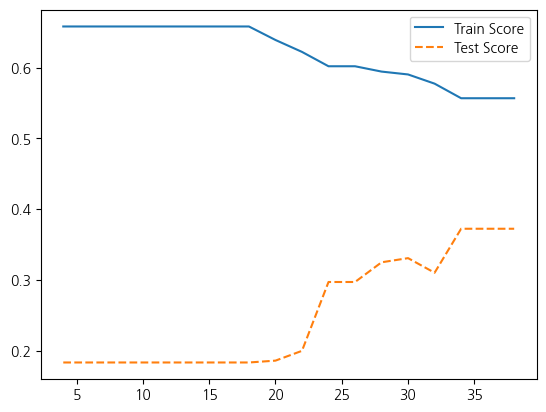

In [133]:
plt.plot(para_split , train_score , linestyle = "-" , label = "Train Score")
plt.plot(para_split , test_score , linestyle = "--" , label = "Test Score")
plt.legend()

min_samples_split 수는 증가에 따라 모델의 설명력은 감소하며,
값이 24일때 test_score 값이 증가하여서 최적값을 24로 선정하였다.

In [141]:
# max_depth 조절

train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 10,
                                min_samples_leaf = 9, min_samples_split = 24 , max_depth = v_max_depth)
    tree.fit(df_train_x , df_train_y)
    train_score.append(tree.score(df_train_x , df_train_y))
    test_score.append(tree.score(df_test_x , df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.302,0.183
1,2,0.433,0.402
2,3,0.504,0.322
3,4,0.547,0.321
4,5,0.588,0.335
5,6,0.602,0.297
6,7,0.602,0.297
7,8,0.602,0.297
8,9,0.602,0.297
9,10,0.602,0.297


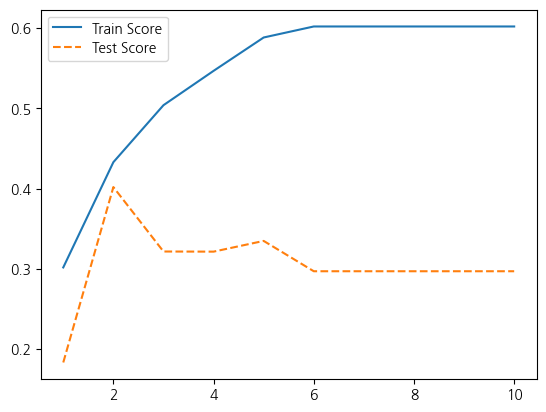

In [142]:
plt.plot(para_depth , train_score , linestyle = "-" , label = "Train Score")
plt.plot(para_depth , test_score , linestyle = "--" , label = "Test Score")
plt.legend()

max_depth 값이 증가하면 모델의 설명력은 증가하지만 test_data에 대해서는 모델의 성능이 감소하게 된다. <br>
따라서 증가했다가 감소하는 2 지점을 최적값으로 선정하였다.

In [143]:
# 최종모델

v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(random_state = 10, min_samples_leaf = 9 ,
                                   min_samples_split = 24 , max_depth = 2)
tree_final.fit(df_train_x , df_train_y)
tree_final.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 9,
 'min_samples_split': 24,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [144]:
test_pred = tree_final.predict(df_test_x)
pd.DataFrame({"실제값" : df_test_y,
              "예측값" : test_pred
             })

,실제값,예측값
67,97,99.094891
208,155,165.424242
210,191,165.424242
129,268,167.275362
79,113,99.094891
...,...,...
217,296,228.142857
403,275,228.142857
162,172,165.424242
125,161,167.275362


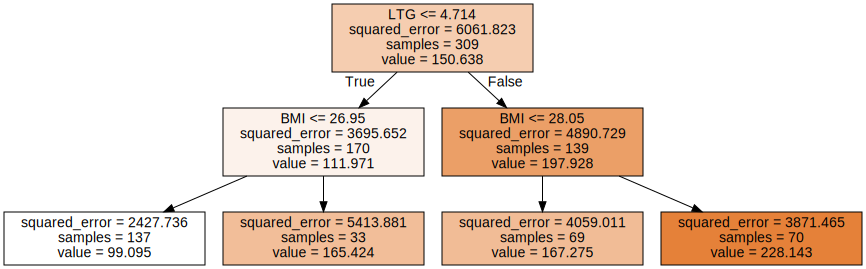

In [138]:
export_graphviz(tree_final, out_file = "tree_final.dot",
               feature_names = v_feature_name , impurity = True , filled = True)
with open("tree_final.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

leaf 수가 총 4개가 나오고, 1집단의 조건은 LTG <= 4.714 and BMI <= 26.95 이다 이 집단의 sample 수는 137이다. <br>
이 집단의 y값은 99이다. 다른 집단도 이와 같이 찾을 수 있다.

In [139]:
# 중요한 변수 판정
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False , inplace = True)
df_importance.round(3)

,Feature,Importance
8,LTG,0.697
2,BMI,0.303
0,AGE,0.000
1,GENDER,0.000
3,BP,0.000
4,CHOLESTEROL,0.000
5,LDL,0.000
6,HDL,0.000
7,TCH,0.000
9,GLUCOSE,0.000


Text(0, 0.5, '변수')

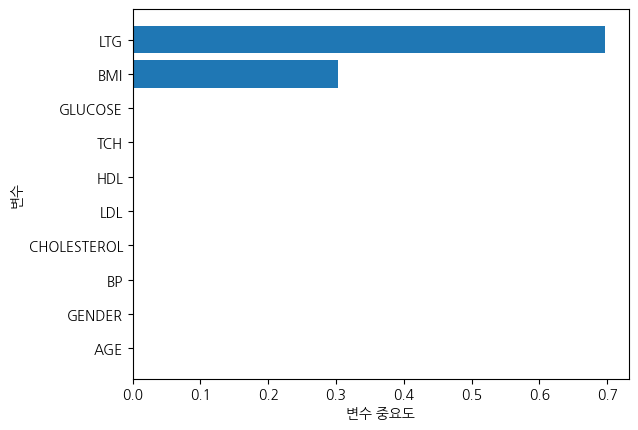

In [140]:
df_importance.sort_values("Importance", ascending = True , inplace = True)
coordinates = range(len(df_importance))
plt.barh( y= coordinates , width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

leaf가 4개 밖에 없어서 2개의 변수만 중요도를 알 수 있다. <br>
당뇨는 나이와 상관이 있어서 나이도 중요하다고 판단된다.


# 실습 3 
랜덤 포레스트

In [58]:
rf_uncustomized = RandomForestRegressor(random_state =10)
rf_uncustomized.fit(df_train_x , df_train_y)
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x , df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x , df_test_y)))


Score on training set : 0.918
Score on test set : 0.482


랜덤포레스트 모델은 data set을 선정할 때 변수의 개수도 랜덤하게 선택하므로 training set 에 대하여 1이 나오지 않는다.

In [60]:
# n_estimatos : 트리 개수 조절 최적의 트리개수 확인

train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state = 10,
                                n_estimators = v_n_estimators)
    rf.fit(df_train_x , df_train_y)
    train_score.append(rf.score(df_train_x , df_train_y))
    test_score.append(rf.score(df_test_x , df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.891,0.423
1,20,0.905,0.457
2,30,0.911,0.467
3,40,0.912,0.469
4,50,0.912,0.477
5,60,0.915,0.475
6,70,0.917,0.476
7,80,0.916,0.477
8,90,0.916,0.479
9,100,0.918,0.482


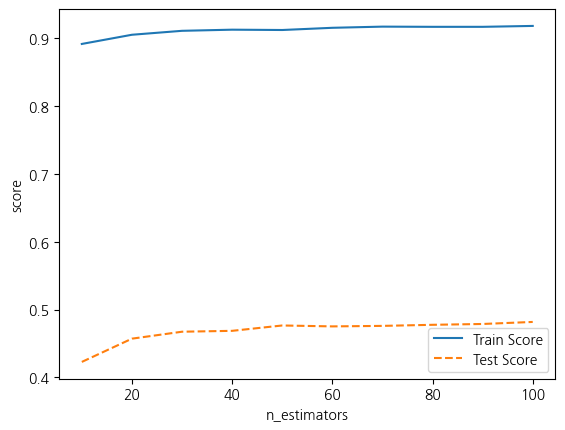

In [61]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

생성하는 결정 트리 수 증가에 따라 모델의 설명력은 증가하며, test set에 대해서도 성능이 비슷하므로 <br>
최대 트리 수에 따른 영향을 배제하고 다른 파라미터의 영향을 확인하고자 100을 선택하였다.

In [62]:
# min_samples_leaf : 잎사귀 최소 자료 수  최적값 찾기

train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    tree = RandomForestRegressor(random_state = 10,
                                 n_estimators = 100,
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x , df_train_y)
    train_score.append(tree.score(df_train_x , df_train_y))
    test_score.append(tree.score(df_test_x , df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.918,0.482
1,2,0.884,0.493
2,3,0.837,0.495
3,4,0.792,0.504
4,5,0.753,0.507
5,6,0.721,0.506
6,7,0.694,0.510
7,8,0.670,0.506
8,9,0.649,0.506
9,10,0.632,0.508


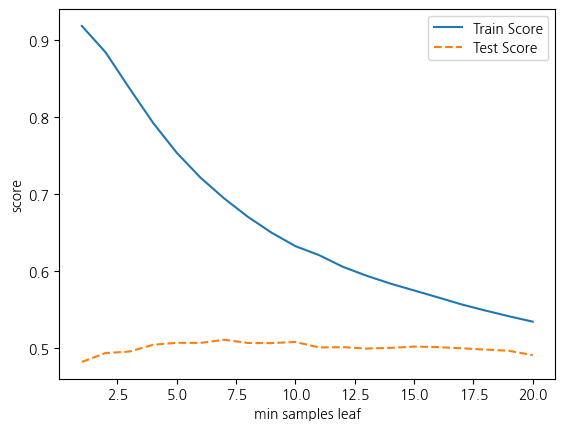

In [63]:
plt.plot(para_leaf , train_score , linestyle = "-" , label = "Train Score")
plt.plot(para_leaf , test_score , linestyle = "--" , label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

min_samples_leaf 수는 train score 과 test score를 고려하여 6으로 선정하였다.

In [64]:
# min_samples_split : 분할하기 위한 노드의 최소 자료 수 최적값 찾기

train_score = []; test_score = []
para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state =10,    n_estimators = 100,
                                min_samples_leaf = 6, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x , df_train_y)
    train_score.append(rf.score(df_train_x , df_train_y))
    test_score.append(rf.score(df_test_x , df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)


,MinSamplesSplit,TrainScore,TestScore
0,4,0.721,0.506
1,6,0.721,0.506
2,8,0.721,0.506
3,10,0.721,0.506
4,12,0.721,0.506
5,14,0.707,0.507
6,16,0.692,0.507
7,18,0.675,0.508
8,20,0.661,0.507
9,22,0.651,0.508


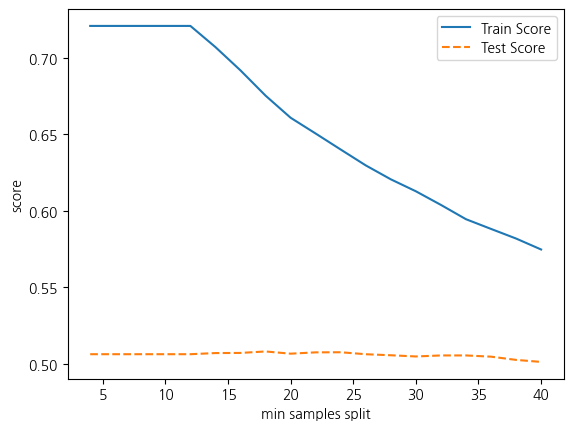

In [65]:

plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

min_samples_split 수는 모든 값에 대하여 test score가 비슷하므로 train score가 떨어지기 전인 14을 선정하였다.

In [145]:
# max_depth: 최대 깊이 변경 최적값 찾기

train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=10, n_estimators = 100,
                               min_samples_leaf = 6, min_samples_split = 14,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.391,0.326
1,2,0.502,0.450
2,3,0.578,0.479
3,4,0.639,0.484
4,5,0.681,0.478
5,6,0.703,0.476
6,7,0.711,0.475
7,8,0.713,0.475
8,9,0.713,0.475
9,10,0.713,0.475


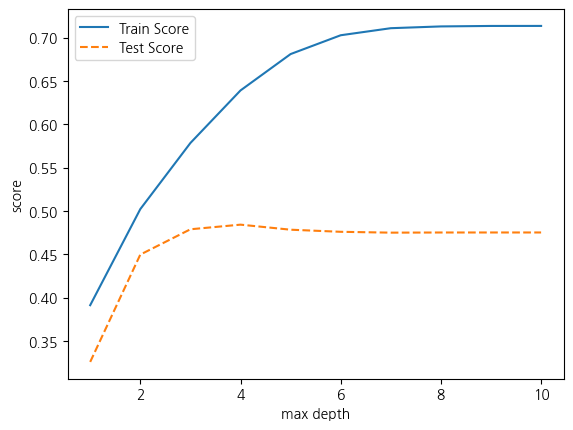

In [146]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

max depth 값이 증가함에 따라 test_score는 일정하게 되므로 4로 선정하였다.

In [147]:
# 144 Page
rf_final = RandomForestRegressor(random_state=10, n_estimators = 100, 
                                 min_samples_leaf = 6,
                                 min_samples_split = 14, max_depth = 4)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.639
Score on test set: 0.484


In [148]:
test_pred = rf_final.predict(df_test_x)
pd.DataFrame({"실제값" : df_test_y,
              "예측값" : test_pred
             })

,실제값,예측값
67,97,114.995102
208,155,206.513806
210,191,134.071540
129,268,203.539906
79,113,106.904359
...,...,...
217,296,226.776753
403,275,266.935720
162,172,128.787173
125,161,174.049764


In [149]:
# 파라미터 값 확인
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 14,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [150]:
# 변수 중요도 
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False , inplace = True)
df_importance.round(3)

,Feature,Importance
8,LTG,0.486
2,BMI,0.275
3,BP,0.077
6,HDL,0.045
9,GLUCOSE,0.033
5,LDL,0.033
0,AGE,0.025
4,CHOLESTEROL,0.013
7,TCH,0.008
1,GENDER,0.004


Text(0, 0.5, '변수')

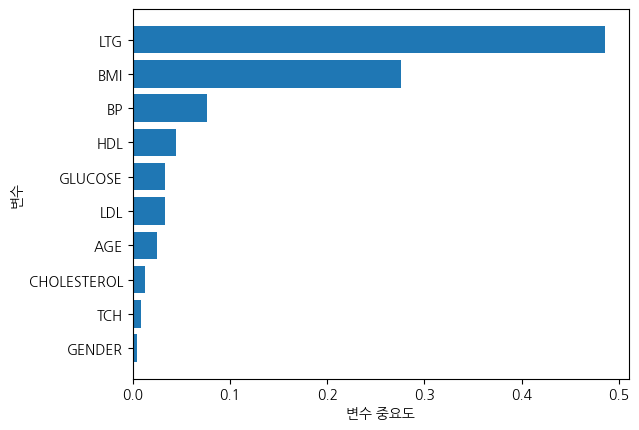

In [151]:
df_importance.sort_values("Importance", ascending = True , inplace = True)
coordinates = range(len(df_importance))
plt.barh( y= coordinates , width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

가장 높은 중요도를 갖는 변수는 LTG이다. <br>
결정계수의 값이 0.5수준에 머문다.<br>
의학데이터를 다루는 모델의 정확도는 중요하다고 판단되기에 결정계수가 0.5수준인 이 모델은 실무에서 사용하기 어렵다고 판단된다.

# 실습 4
그래디언트 부스팅

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

gb_uncustomized = GradientBoostingRegressor(random_state =10)
gb_uncustomized.fit(df_train_x , df_train_y)
print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x , df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x , df_test_y)))


Score on training set : 0.865
Score on test set : 0.449


In [81]:
# n_estimatos: 트리 수 변경(10~100) 최적값 찾기

train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 10, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.498,0.402
1,20,0.633,0.470
2,30,0.708,0.481
3,40,0.744,0.483
4,50,0.772,0.484
5,60,0.797,0.477
6,70,0.821,0.472
7,80,0.835,0.465
8,90,0.850,0.459
9,100,0.865,0.449


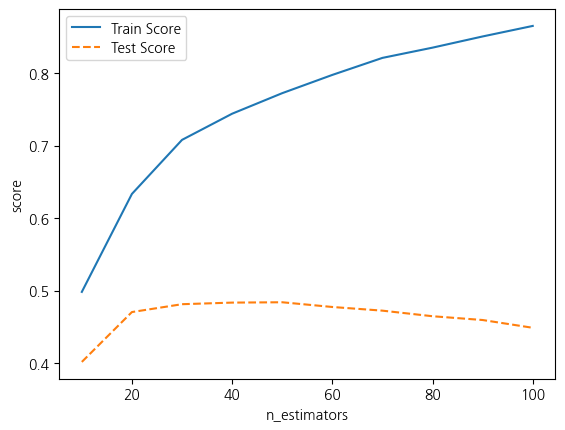

In [82]:

plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

train set 과 test set에서 score를 봤을 때 최적의 트리 수는 40이라고 판단했다.

In [83]:
# min_samples_leaf: 잎사귀 최소 자료 수 최적값 찾기

train_score = []; test_score = []

para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=10, n_estimators = 40,
                                   min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.744,0.483
1,2,0.744,0.482
2,3,0.741,0.474
3,4,0.740,0.481
4,5,0.730,0.476
5,6,0.734,0.478
6,7,0.726,0.483
7,8,0.727,0.483
8,9,0.715,0.485
9,10,0.716,0.490


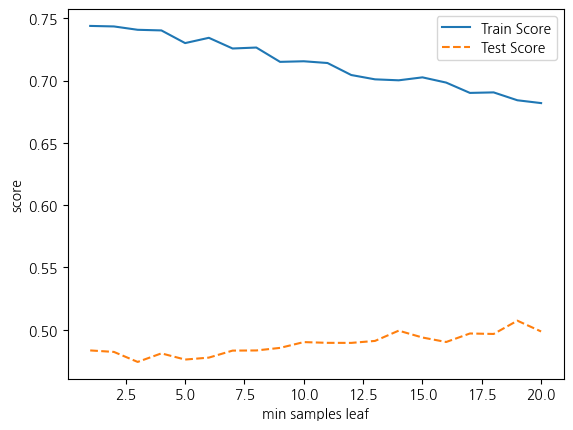

In [84]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

min_samples_leaf 수는 증가하면 모델의 설명력은 감소한다. <br>
test score 를 고려하여 최적값은 13으로 선정하였다.

In [153]:
# min_samples_split: 분할하기 위한 노드의 최소 자료 수 최적값 찾기

train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=10, n_estimators = 40, 
                                   min_samples_leaf = 13,
                                   min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.710,0.448
1,4,0.710,0.448
2,6,0.710,0.448
3,8,0.710,0.448
4,10,0.710,0.448
5,12,0.710,0.448
6,14,0.710,0.448
7,16,0.710,0.448
8,18,0.710,0.448
9,20,0.710,0.448


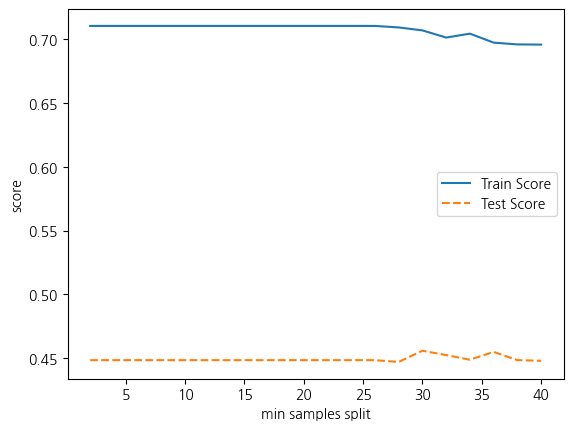

In [154]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

min_samples_split 수는 증가함에 따라 설명력은 감소한다. <br>
30에서 test score값이 올라가서 30으로 선정하였다.

In [159]:
# max_depth: 최대 깊이 변경 최적값 설정
train_score = []; test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state= 10, n_estimators = 40, 
                                   min_samples_leaf = 13,
                                   min_samples_split = 30, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.535,0.453
1,2,0.623,0.475
2,3,0.707,0.456
3,4,0.778,0.448
4,5,0.826,0.428
5,6,0.855,0.428
6,7,0.871,0.412
7,8,0.881,0.418
8,9,0.882,0.403
9,10,0.885,0.411


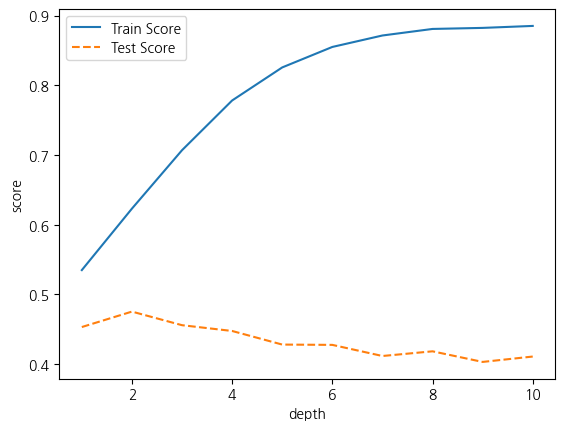

In [160]:

plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

깊이가 증가에 따라 모델의 설명력은 증가한다. <br>
train score 와 test score를 봤을 때 최적은 4로 선정하였다.

In [162]:

# learning_rate: 학습률 변경에 따른 모델 성능 최적값 확인

train_score = []; test_score = []

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=10, n_estimators = 40,
                                   min_samples_leaf = 13,
                                   min_samples_split = 30, max_depth = 4, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.778,0.448
1,0.2,0.865,0.367
2,0.3,0.905,0.368
3,0.4,0.939,0.293
4,0.5,0.959,0.235
5,0.6,0.965,0.150
6,0.7,0.970,0.176
7,0.8,0.987,0.183
8,0.9,0.983,0.174


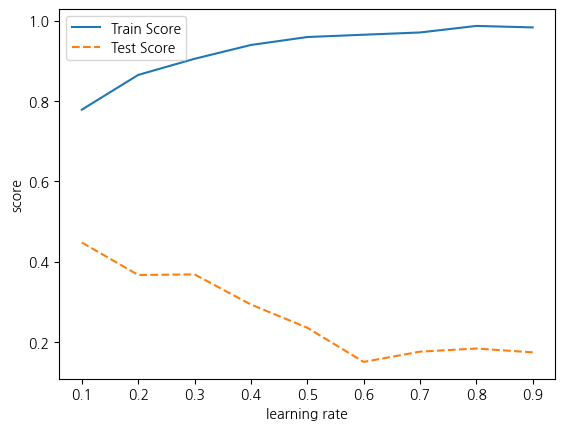

In [163]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

learning rate는 0.1에서 test score가 가장 높아서 0.1로 선정하였다.

In [164]:
# 174 Page
# 최종모델 선택
gb_final = GradientBoostingRegressor(random_state=10, n_estimators = 40, 
                                     min_samples_leaf = 13,
                                     min_samples_split = 30, max_depth = 4, 
                                     learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.778
Score on test set: 0.448


train set에서는 0.778인데 test set에서는 0.448이므로 과대적합된것으로 파악할 수 있다.

In [166]:
test_pred =gb_final.predict(df_test_x)
pd.DataFrame({"실제값" : df_test_y,
              "예측값" : test_pred
             })

,실제값,예측값
67,97,99.494008
208,155,214.616763
210,191,129.865128
129,268,221.107099
79,113,125.910760
...,...,...
217,296,240.323814
403,275,276.229169
162,172,125.126959
125,161,174.213925


In [167]:
# feature_importances_: 설명변수의 중요도
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
8,LTG,0.442
2,BMI,0.233
3,BP,0.082
5,LDL,0.050
6,HDL,0.049
9,GLUCOSE,0.047
0,AGE,0.045
1,GENDER,0.019
4,CHOLESTEROL,0.017
7,TCH,0.016


Text(0, 0.5, '변수')

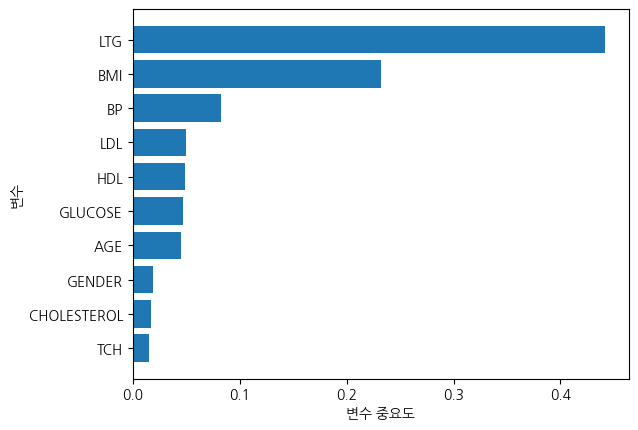

In [168]:

df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

가장 높은 중요도를 갖는 변수는 LTG이다. <br>
결정계수의 값이 0.5수준에 머문다. <br>
의학데이터를 다루는 모델의 정확도는 중요하다고 판단되기에 결정계수가 0.5수준인 이 모델은 실무에서 사용하기 어렵다고 판단된다.

# 모델평가

In [96]:
df

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,75,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,141,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,206,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,135,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...,...
437,178,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,104,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,132,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,220,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [97]:
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 10)


In [178]:

# 회귀 모델
lr_model = smf.ols(formula = "Y ~ AGE+GENDER+BMI+BP+CHOLESTEROL+TCH+LTG+GLUCOSE", data = df_train)
lr_result = lr_model.fit()

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=10, min_samples_leaf = 9, min_samples_split = 24, max_depth = 2 )
dt_model.fit(df_train_x, df_train_y)

# Random Forest
rf_model = RandomForestRegressor(random_state=10, n_estimators = 100, min_samples_leaf = 6,
                                 min_samples_split = 14, max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=10, n_estimators = 40, min_samples_leaf = 13, 
                                     min_samples_split = 30, max_depth = 4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=13,
                          min_samples_split=30, n_estimators=40,
                          random_state=10)

In [184]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
mse, rmse, mae, mape = [],[],[],[]

# 회귀분석예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['Y'], lr_y_pred))
rmse.append(mean_squared_error(df_test['Y'], lr_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Y'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Y'], lr_y_pred))

# 의사결정나무예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

# 랜덤포레스트예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 그래디언트부스팀예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

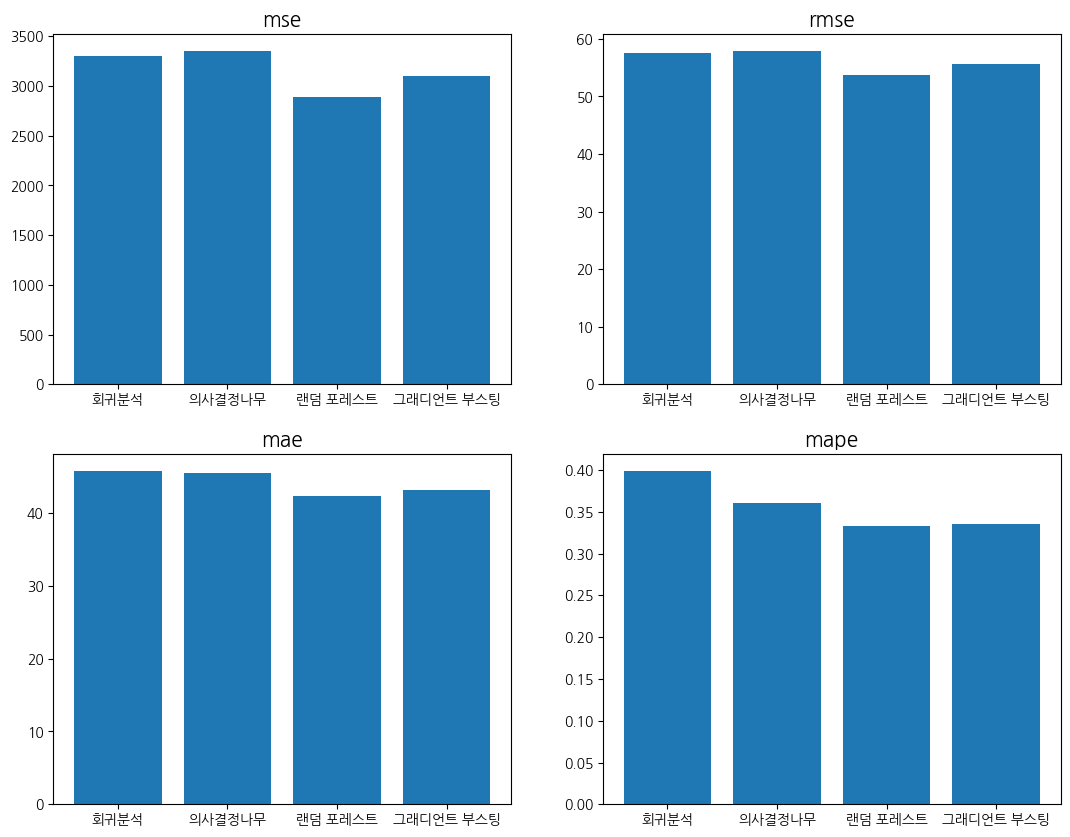

In [185]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)

랜덤 포레스트의 성능이 제일 높은것으로 판단된다. 하지만 랜덤 포레스트는 블랙박스 모형이기에 의학데이터에서 설명력은 중요하기에,<br>
의학데이터는 회귀분석으로 모델링을 하는 것이 좋아보인다.